In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer
from qiskit.tools.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as plt

In [2]:
nq = 3    # number of qubits
m = 3    # number of classical bits
q = QuantumRegister(nq,'q')
c = ClassicalRegister(m,'c')
qc = QuantumCircuit(q,c)

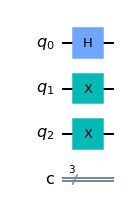

In [3]:
qc.h(0)
qc.x([1,2])
qc.draw('mpl')

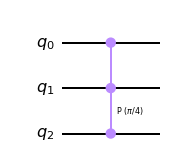

In [4]:
cu_circ = QuantumCircuit(nq)
cu_circ.mcp(pi/4,[0,1],2)
cu_circ.draw('mpl')

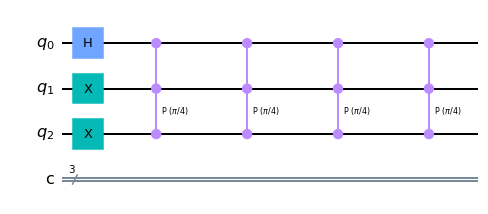

In [5]:
for _ in range(2**(m-1)):
    qc.mcp(pi/4,[0,1],2)
qc.draw('mpl')

In [8]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)

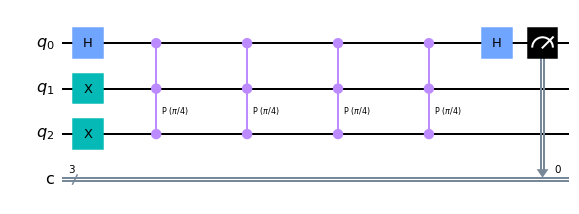

In [9]:
x_measurement(qc, q[0], c[0])
qc.draw('mpl')

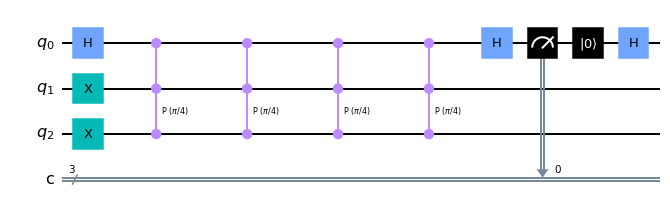

In [10]:
qc.reset(0)
qc.h(0)
qc.draw('mpl')

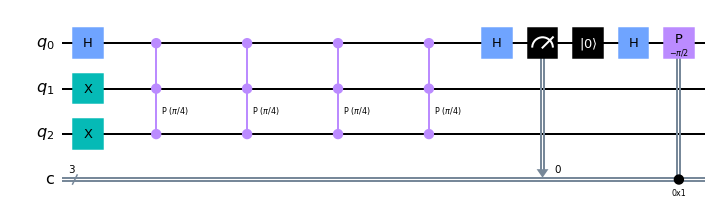

In [11]:
qc.p(-pi/2,0).c_if(c,1)
qc.draw('mpl')

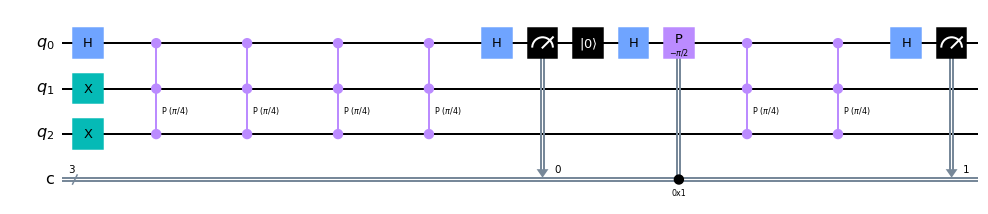

In [12]:
for _ in range(2**(m-2)):
    qc.mcp(pi/4,[0,1],2)
x_measurement(qc, q[0], c[1])
qc.draw('mpl')

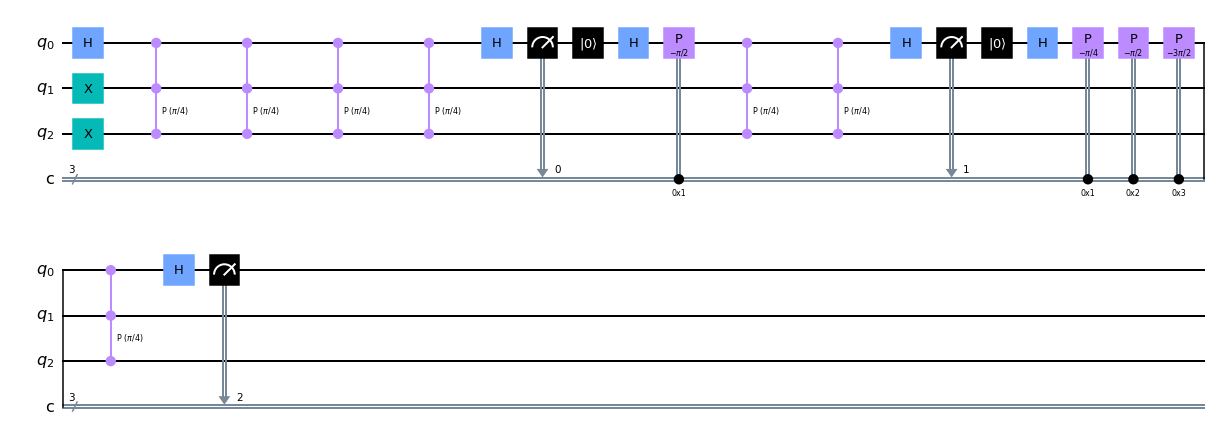

In [13]:
# initialization of qubit q0
qc.reset(0)
qc.h(0)
# phase correction
qc.p(-pi/4,0).c_if(c,1)
qc.p(-pi/2,0).c_if(c,2)
qc.p(-3*pi/2,0).c_if(c,3)
# c-U operations
for _ in range(2**(m-3)):
    qc.mcp(pi/4,[0,1],2)
# X measurement
qc.h(0)
qc.measure(0,2)
qc.draw('mpl')

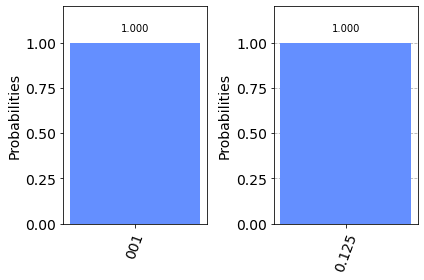

In [15]:
sim = Aer.get_backend('qasm_simulator')
count0 = sim.run(transpile(qc, sim)).result().get_counts()
key_new = [str(int(key,2)/2**m) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))
fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()